In [1]:
import sys; sys.path.insert(0,'../../../mySoftware/MySoftwarePackage/mac'); from plot_tools import *
anafiles_dir = '/Users/erezcohen/Desktop/DensityFluctuations/AnaFiles/csv_files'
%matplotlib inline
from matplotlib.ticker import NullFormatter

In [56]:
generic = lambda x: ast.literal_eval(x)

# load data

In [139]:
distances = pd.read_csv('/Users/erezcohen/Desktop/DensityFluctuations/anafiles/c12-ico6-10k_rd200_1fm_pairs_distance.csv'
                       ,converters={'NN < 1.0 fm':generic,'pp < 1.0 fm':generic
                                    ,'nn < 1.0 fm':generic,'np < 1.0 fm':generic
                                    ,'N distances':generic,'p distances':generic,'n distances':generic})

In [140]:
len(distances)
# distances

10000

In [118]:
def get_array_from_list_cell(df=None,variable=None):
    array = []
    for x in np.concatenate([(df[variable]).ravel()]):
        if type(x)==type([0.1,0.2]):
            for x_object in x:
                if x_object!=-9999: array.append(x_object)
        else:
            if x!=-9999: array.append(x)
    return array

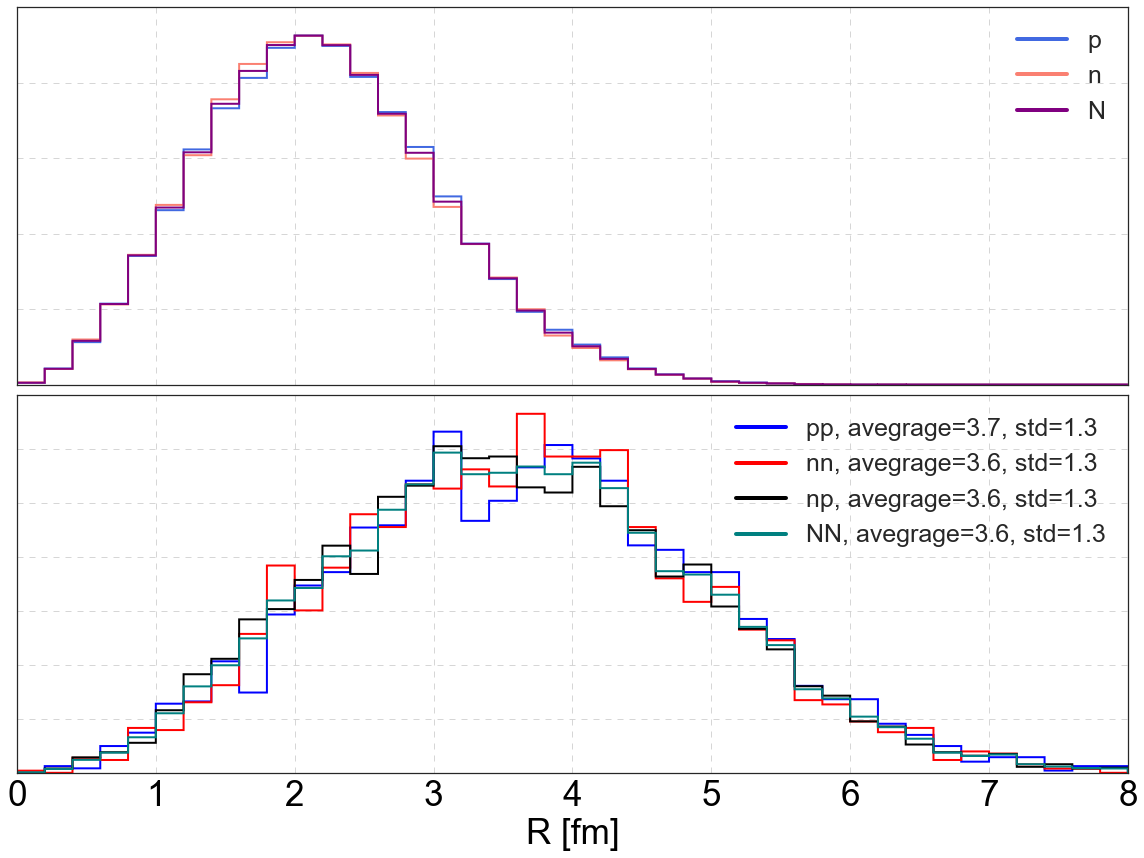

In [144]:
# a plot to send Massi
d = 1.0 # fm
fig = plt.figure(figsize=(16,12))
bins = np.linspace(0,8,41)

ax=fig.add_subplot(2,1,1)
for i,(particle_type,color) in enumerate(zip(['p','n','N']
                                             ,['royalblue','salmon','purple'])):
    array = get_array_from_list_cell(df=distances,variable=particle_type+' distances')
    plt.hist( array , bins=bins,color=color, histtype='step',linewidth=2,normed=1)
    plt.plot([0,0],[0,0],label=particle_type,linewidth=4,color=color)        
set_axes(ax,'',do_add_grid=True)
plt.legend(fontsize=25)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
ax.set_xlim(0,8)

    
ax=fig.add_subplot(2,1,2)
for i,(pair_type,color) in enumerate(zip(['pp','nn','np','NN']
                                         ,['blue','red','black','teal'])):
    array = get_array_from_list_cell(df=distances,variable=pair_type+' < %.1f fm'%d)
    plt.hist( array , bins=bins,color=color, histtype='step',linewidth=2,normed=1)
    average = np.average(array)
    std = np.std(array)
    plt.plot([0,0],[0,0],label=pair_type+', avegrage=%.1f, std=%.1f'%(average,std),linewidth=4,color=color)        
set_axes(ax,'R [fm]',fontsize=35,do_add_grid=True)
plt.legend(fontsize=25)
ax.yaxis.set_major_formatter(NullFormatter())
ax.set_xlim(0,8)
plt.tight_layout()